In [249]:
import pandas as pd

from itertools import chain
from collections import defaultdict

edmund = pd.read_csv('Assignment 3 Edmunds Posts.csv')

In [250]:
def repl(w,car_type_list):
    l = []
    for ww in w:
        if ww in car_brand.keys() and len(set(car_brand[ww]).intersection(car_type_list))==1:
            l.append(list(set(car_brand[ww]).intersection(car_type_list))[0])
        else:
            l.append(ww)
    return l
def repl2(w):
    l=[]
    for ww in w:
        if ww=='sc':
            l.append('sclass')
        else:
            if ww=='ls':
                l.append('lexusls')
            else:
                if ww=='es':
                    l.append('lexuses')
                else:
                    if ww=='mb' or ww=='benz':
                        l.append('mercedes')
                    else:
                        l.append(ww)
    return l
    

In [138]:
car_type_list = ['3series']
stri = ['bmw','bmw','ls']
print repl2(stri)

['bmw', 'bmw', 'lexusls']


In [222]:
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

wnl = WordNetLemmatizer()

car_type = ['a6','a8','3series','5series','7series','xj','rx','sclass','lexusls','lexuses']
car_brand={'audi':['a6','a8'],'bmw':['3series','5series','7series'],'jaguar':'xj','lexus':['es','ls','rx','lexusls','lexuses'],'mercedes':['sc','sclass'],'mb':['sc','sclass']}
type_brand = ['a6','a8','3series','5series','7series','xj','rx','sclass','lexusls','lexuses','audi','bmw','jaguar','lexus','mercedes']
parsed=[]
for ind in range(len(test)):
    post = re.sub('-','',edmund.loc[ind,'Posts'])
    post = re.sub(r"[^\w\d']+",' ',post)
    post = post.lower()
    temp = []
    review_temp = []
    tokenized = nltk.word_tokenize(post)
    tokenized = [word for word in tokenized if word not in stopwords.words('english')]
    tokenized = [wnl.lemmatize(word) for word in tokenized]
    tokenized = repl2(tokenized)
    car_type_list=[]
    for u in tokenized:
        if u in car_type:
            car_type_list.append(u)
    tokenized =  repl(tokenized,car_type_list)
    for i,j in enumerate(tokenized):
        if j in type_brand and i<(len(tokenized)-5):
            temp.extend(tokenized[i-5:i+6])
            temp = " ".join(temp)
            car_tup = [temp,tokenized[i]]
            review_temp.append(car_tup)
            temp = []
        else:
            if j in type_brand and i>=(len(tokenized)-5):
                temp.extend(tokenized[i-5:])
                temp = " ".join(temp)
                car_tup = [temp,tokenized[i]]
                review_temp.append(car_tup)
                temp = []
    if review_temp:
        parsed.append(review_temp)
    review_temp = []
    



In [223]:
for i,j in enumerate(parsed):
    for a,b in enumerate(j):
        blob = TextBlob(b[0])
        b[0] = blob.sentiment.polarity
            
parsed

[[[0.0, 'sclass'],
  [0.05952380952380952, 'sclass'],
  [-0.25, 'sclass'],
  [0.45000000000000007, 'sclass'],
  [0.25, 'a8']],
 [[0.0, 'lexus'], [0.4, 'lexus'], [-0.2916666666666667, 'lexus']],
 [[0.2, 'a8'],
  [0.0, 'lexusls'],
  [0.0, 'sclass'],
  [0.06666666666666667, '7series'],
  [0.06666666666666667, 'a8'],
  [0.2333333333333333, 'lexusls'],
  [0.35, '7series'],
  [0.5, 'a8'],
  [0.0, 'lexusls'],
  [0.0, 'sclass'],
  [0.0, '7series'],
  [0.0, 'a8'],
  [0.0, 'sclass'],
  [0.0, '7series'],
  [0.0, 'lexusls'],
  [-0.6999999999999998, 'a8'],
  [0.1, 'a8'],
  [0.0, 'a8'],
  [0.0, 'sclass']],
 [[0.0, 'lexuses'],
  [-0.09999999999999999, 'lexuses'],
  [0.4125, 'rx'],
  [0.6, 'lexus']],
 [[0.0, 'bmw'],
  [0.0, 'sclass'],
  [0.0, 'lexuses'],
  [0.0, 'rx'],
  [0.0, 'lexuses'],
  [0.0, 'rx'],
  [0.0, '3series'],
  [0.0, 'bmw'],
  [0.0, 'sclass'],
  [0.0, 'lexus'],
  [0.15, 'sclass'],
  [0.09999999999999999, 'bmw'],
  [-0.5, 'lexus'],
  [0.2, 'sclass'],
  [0.0, 'lexus'],
  [0.0, 'lexusls'],


In [224]:
listx = []
for i in range(len(parsed)):
    dict={}
    for [a,b] in parsed[i]:
        if b not in dict.keys():
            dict[b]=a
        else:
            dict[b] +=a
    listx.append(dict)

In [225]:
ss = pd.DataFrame(listx)
ss.head()

,3series,5series,7series,a6,a8,audi,bmw,jaguar,lexus,lexuses,lexusls,mercedes,rx,sclass,xj
0,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259524,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108333,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.416667,NaN,0.166667,NaN,NaN,NaN,NaN,NaN,0.233333,NaN,NaN,0.000000,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,-0.1,NaN,NaN,0.4125,NaN,NaN
4,0.0,NaN,0.000000,NaN,NaN,NaN,1.1,NaN,0.500000,0.0,0.000000,NaN,0.0000,0.850000,NaN


In [226]:

ss.columns=['3series','5series','7series','A6','A8','Audi','BMW','Jaguar','Lexus','ES','LS','Mercedes','RX','Sclass','XJ']

In [228]:
sss  = ss[['3series','5series','7series','A6','A8','ES','LS','RX','Sclass','XJ']]
senti = ss[['3series','5series','7series','A6','A8','ES','LS','RX','Sclass','XJ']].copy()

for i in range(len(sss.columns)):
    for ii in range(i+1,len(sss.columns)):
            temp = sss.columns[i] +'_'+sss.columns[ii]
            senti[temp]=sss[sss.columns[i]]-sss[sss.columns[ii]]
use = []
for q in senti.columns[10:]:
    #qq = sum(senti[q].dropna())/(len(senti[q]) - senti[q].count(None))
    p1,p2 = re.split('_',q)
    neg = (senti[q]<0)
    neg_sent  = senti[q][neg].sum()/senti[q][neg].count()
    pos = (senti[q]>0)
    pos_sent  = senti[q][pos].sum()/senti[q][pos].count()
    use.append((p1,p2,pos_sent,neg_sent))

use[:]

[('3series', '5series', 0, 0),
 ('3series', '7series', 0, 0),
 ('3series', 'A6', 0, 0),
 ('3series', 'A8', 0, 0),
 ('3series', 'ES', 0, -0.2363636363636364),
 ('3series', 'LS', 2.940151515151514, -0.9600108225108226),
 ('3series', 'RX', 2.533658008658008, -0.19375),
 ('3series', 'Sclass', 0.20687229437229443, -0.706060606060606),
 ('3series', 'XJ', 0, 0),
 ('5series', '7series', 0, 0),
 ('5series', 'A6', 0, 0),
 ('5series', 'A8', 0, 0),
 ('5series', 'ES', 0, -0.3),
 ('5series', 'LS', 0, 0),
 ('5series', 'RX', 0, -0.3),
 ('5series', 'Sclass', 0, -0.55),
 ('5series', 'XJ', 0, 0),
 ('7series', 'A6', 0, 0),
 ('7series', 'A8', 0.29814393939393935, -1.3666666666666667),
 ('7series', 'ES', 0, 0),
 ('7series', 'LS', 0.4365530303030303, -0.673989898989899),
 ('7series', 'RX', 0.6506493506493507, 0),
 ('7series', 'Sclass', 0.4313744588744589, -0.565719696969697),
 ('7series', 'XJ', 0.806060606060606, 0),
 ('A6', 'A8', 0.2, -0.10625000000000001),
 ('A6', 'ES', 0, 0),
 ('A6', 'LS', 0, -0.363501082

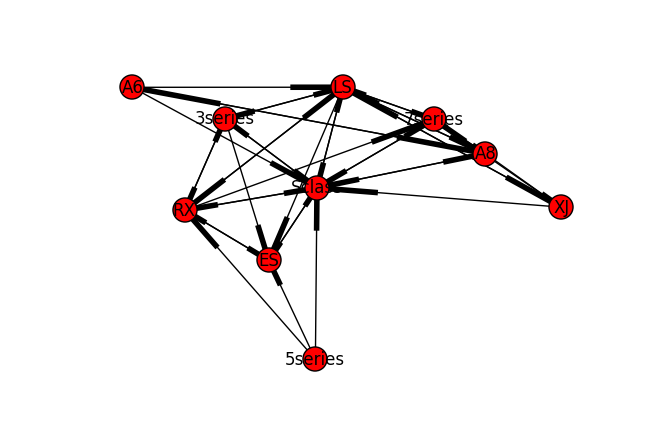

In [229]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

G = nx.DiGraph()

G.add_nodes_from(sss.columns)

for a,b,pos,neg in use:
    if pos!=0 :
        G.add_edge(b,a,{'weight':pos})
    if neg!=0:
        G.add_edge(a,b,{'weight':abs(neg)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

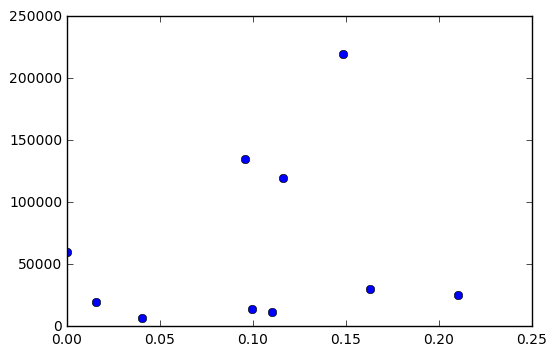

In [230]:
pr = nx.pagerank(G, alpha=1,weight='weight')
pr_df = pd.DataFrame.from_dict(pr,orient='index')
pr_df = pr_df.reset_index()
pr_df.columns=['Model','pr']
cs = pd.read_csv('/Users/leeanthea/Desktop/car_sales.csv')
cs = cs.merge(pr_df)

plt.plot(cs['pr'], cs['Sales'], marker='o', linestyle='')

In [231]:
cs

,Model,Sales,pr
0,A6,20000,0.015779
1,A8,12000,0.110236
2,3series,220000,0.148647
3,5series,60000,0.000000
4,7series,14000,0.099390
5,XJ,6600,0.040425
6,ES,135000,0.095883
7,LS,30000,0.162774
8,RX,120000,0.116491
9,Sclass,25000,0.210375


In [232]:
cs[['pr','Sales']].corr(method='pearson', min_periods=1)

,pr,Sales
pr,1.000000,0.207299
Sales,0.207299,1.000000
